In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [22]:
plt.rcParams.update({
    'text.usetex' : True,
    "font.family": "serif",
    "font.monospace": 'Computer Modern'
})

In [41]:
def GenerateHJMPaths(r0,sigma,T,maturity, nPaths,nSteps):
    times = [i/365 for i in range(1,nSteps+1)]
    drift = [sigma**2*(T-t) for t in times]
    #print(len(drift))
    paths = np.zeros(shape=(nPaths,nSteps+1))
    paths[:,0]=r0
    timestep = maturity/nSteps
    #print(nSteps)
    #Define a random value W(t) for every time step t+dt
    random_factor = [np.random.normal() for i in range(1,nSteps+1)]
    for i in range(nPaths):
        for j in range(1,nSteps+1):
            paths[i,j]=paths[i,j-1]+drift[j-1]*timestep+sigma*np.sqrt(timestep)*random_factor[j-1]
    return paths

In [52]:
sigma = 0.01
T = [5.5, 7,9,11]
T_1 = 7
r0 = [0.002*i for i in T]
maturity = 5
nPaths = 1
nSteps = int(maturity*365)
times = [i/365 for i in range(nSteps)]
timeGrid = np.linspace(0,maturity,nSteps+1)
HJM_Paths = [GenerateHJMPaths(r0[i],sigma,T[i],maturity,nPaths, nSteps) for i in range(len(T))]


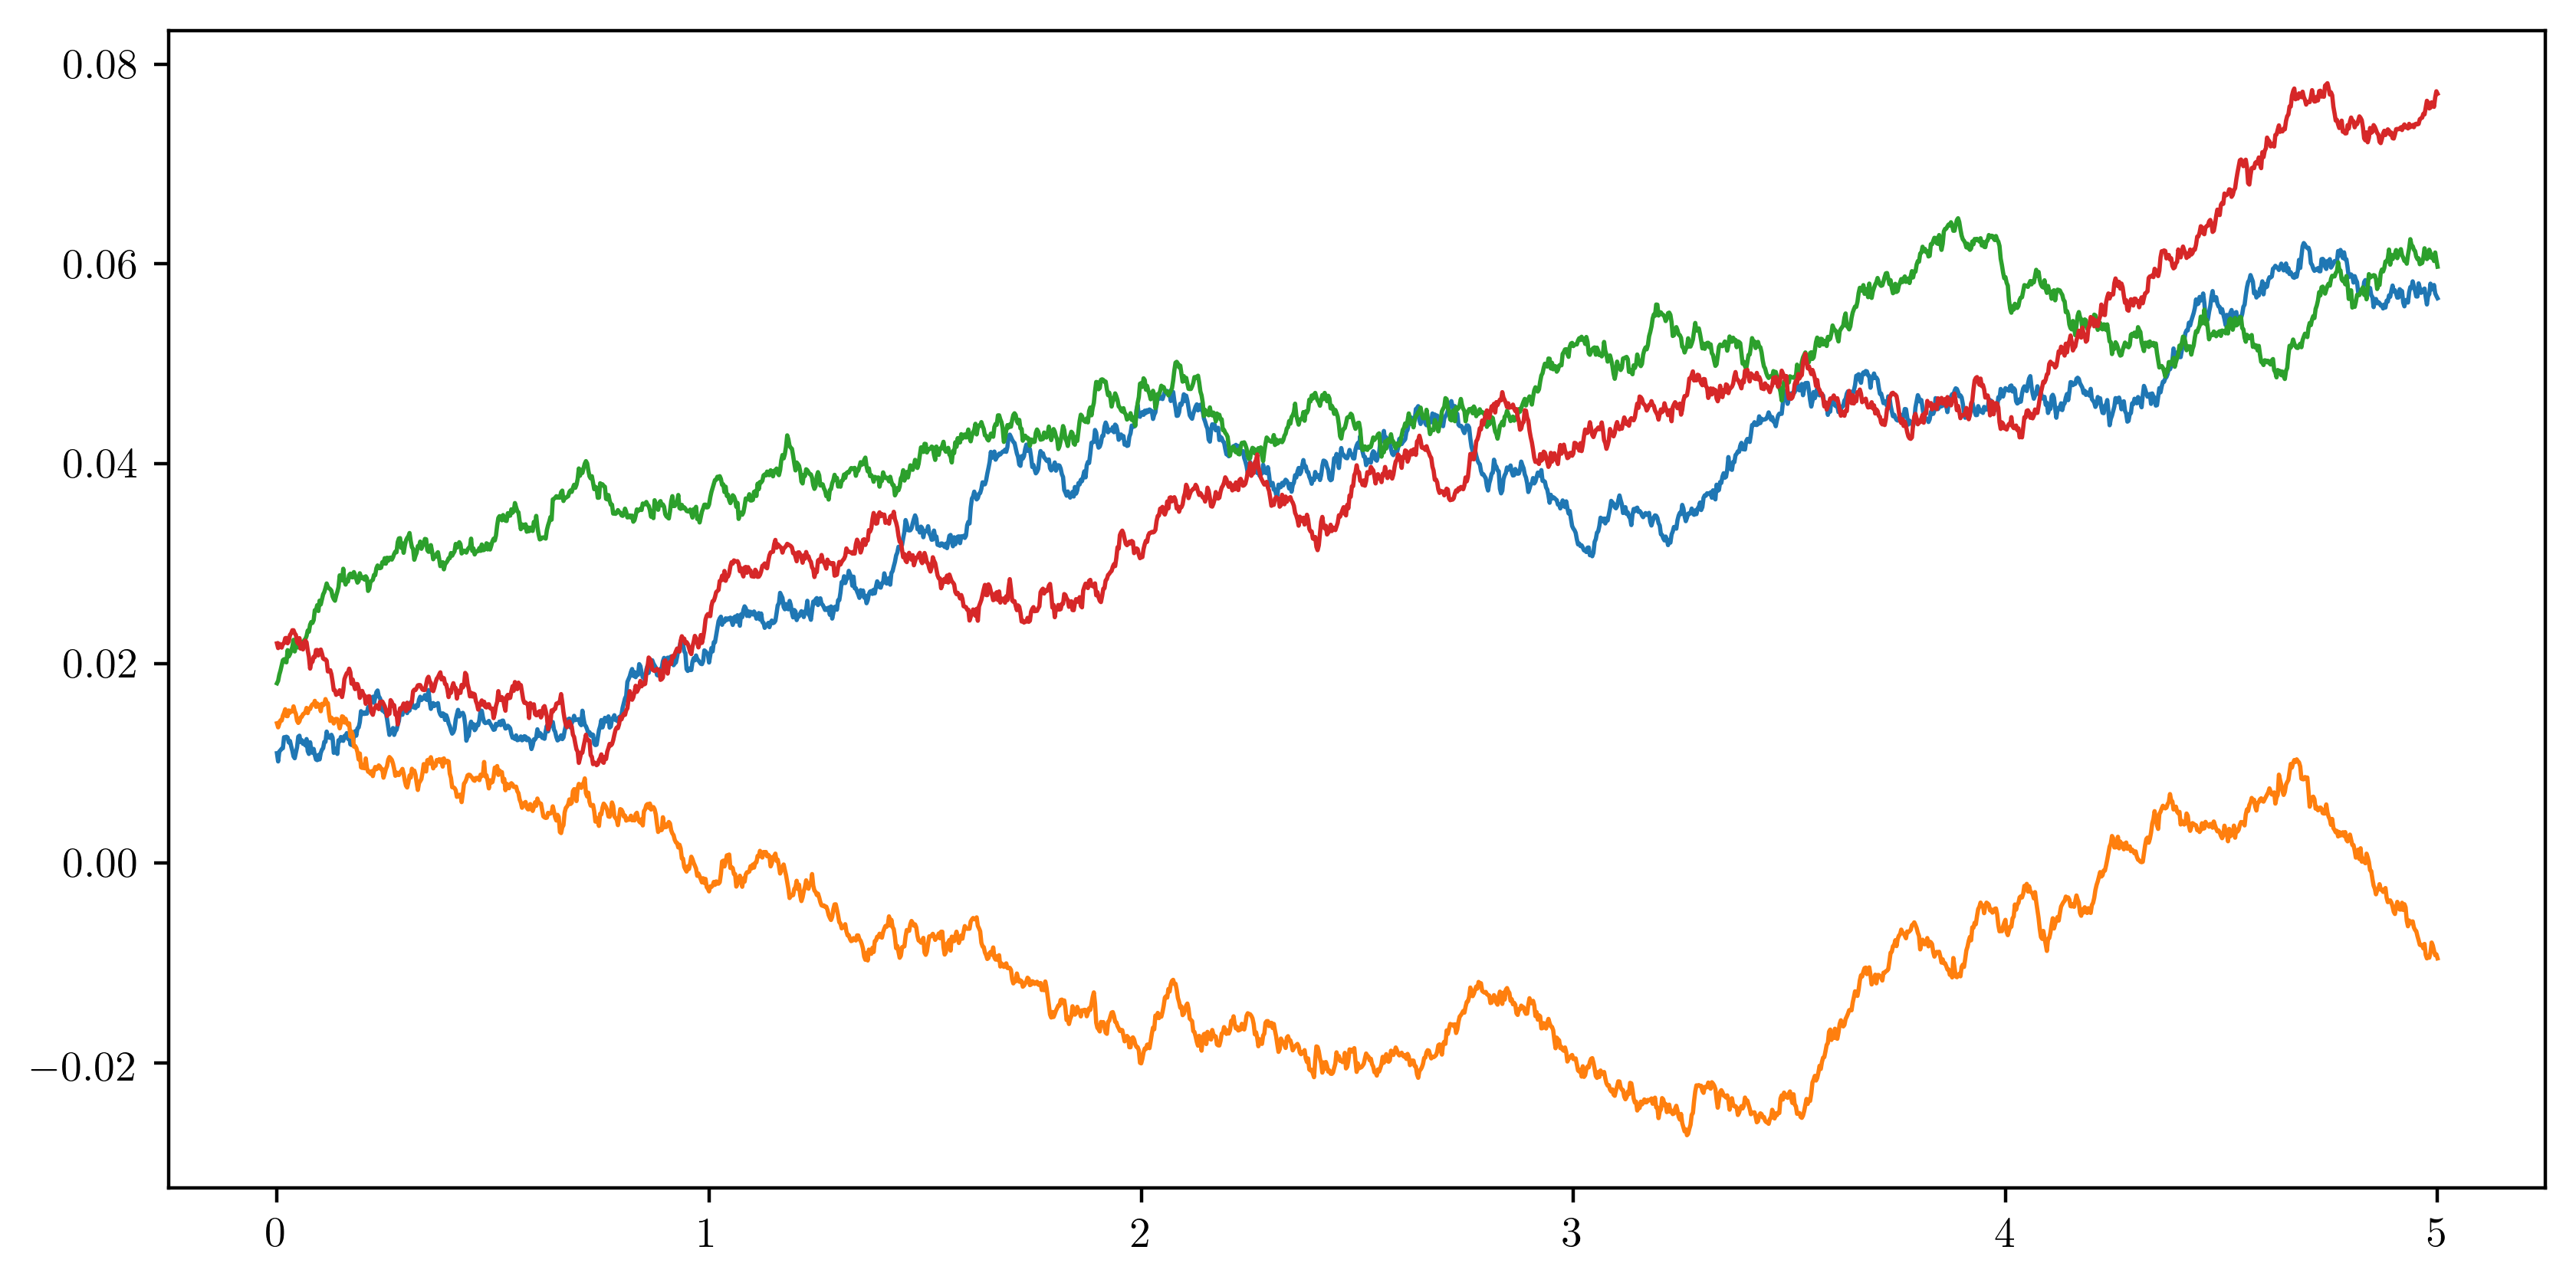

In [53]:
figure = plt.figure(figsize=(10,5), dpi=400)
for i in range(len(HJM_Paths)):
    for j in range(nPaths):
        plt.plot(timeGrid, HJM_Paths[i][j,:], linewidth=1)
    
plt.show()

In [66]:
path1 = np.cumsum(HJM_Paths[0])
path2 = np.cumsum(HJM_Paths[1])

corr, _ = pearsonr(path1,path2)
display(corr)
#Why not 1 or -1? Should they not be exactly correlated?

-0.9608006374283427

(1000, 5)

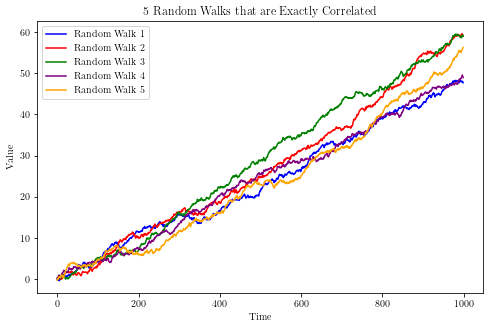

In [63]:
# Parameters for random walks
n = 1000  # Number of steps
mu = 0.05  # Mean return
sigma = 0.2  # Volatility
rho = 1.0  # Correlation coefficient

# Generate correlated random normal variables
np.random.seed(123)
x = np.random.normal(size=(n, 5))
y = rho * x + np.sqrt(1 - rho**2) * np.random.normal(size=(n, 5))

# Compute correlated random walks
dx = mu + sigma * x
dy = mu + sigma * y
wx = np.cumsum(dx, axis=0)
for i in range(wx.shape[0]):
    wx[i,0]=2*i+5
wy = np.cumsum(dy, axis=0)
display(wx.shape)

# Plot the random walks
plt.figure(figsize=(8, 5))
plt.plot(wx[:,4], color='blue', label='Random Walk 1')
plt.plot(wy[:, 0], color='red', label='Random Walk 2')
plt.plot(wy[:, 1], color='green', label='Random Walk 3')
plt.plot(wy[:, 2], color='purple', label='Random Walk 4')
plt.plot(wy[:, 3], color='orange', label='Random Walk 5')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('5 Random Walks that are Exactly Correlated')
plt.show()

